## import important libraries 

In [4]:
import warnings
# Ignore the warning
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom, poisson, norm

# Load the dataset
df = pd.read_csv("Accommodation.csv")

In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
1,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
2,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
3,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
4,Flemings White Bridge Caravan and Camping,http://www.killarneycamping.com,+353(0)646631590,-9.475904,52.057113,Kerry,Killarney,Republic of Ireland,Camping


## Step 1: Statistics

In [7]:
# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
df.describe()


Descriptive statistics for numerical columns:


,Longitude,Latitude
count,2339.000000,2339.000000
mean,-8.208845,53.069696
std,1.283439,0.905482
min,-10.514531,51.479594
25%,-9.374312,52.261228
50%,-8.436704,53.122920
75%,-7.023236,53.594261
max,-5.998080,55.361922


## Preprocessing of Dataset 

In [8]:
df.shape

(2339, 9)

In [9]:
# Check Null Value 
df.isnull()

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,False,True,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2334,False,False,False,False,False,False,False,False,False
2335,False,False,False,False,False,False,False,False,False
2336,False,False,False,False,False,False,False,False,False
2337,False,False,False,False,False,False,False,False,False


In [10]:
# Count the Null Value Accoding the columns wise 
df.isnull().sum()

Name                 0
Url                161
Telephone            4
Longitude            0
Latitude             0
AddressRegion        0
AddressLocality    163
AddressCountry       0
Tags                 0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum().sum()

0

In [13]:
# Check Dublicate Columns 
# Check for duplicate values in specific columns
duplicate_in_column = df.duplicated()

# Display the rows with duplicate values in the specified columns
print("Duplicate values in specified columns:")
print(df[duplicate_in_column])

Duplicate values in specified columns:
Empty DataFrame
Columns: [Name, Url, Telephone, Longitude, Latitude, AddressRegion, AddressLocality, AddressCountry, Tags]
Index: []


In [14]:
descriptive_stats = df.describe()
print(descriptive_stats)
## diiffrence is clear after preprocess the dataset 

         Longitude     Latitude
count  2029.000000  2029.000000
mean     -8.173382    53.067448
std       1.300118     0.906434
min     -10.514531    51.479594
25%      -9.374026    52.259917
50%      -8.369672    53.124848
75%      -6.947458    53.548435
max      -5.998080    55.361922


##  Apply some graph for Visualize the Data

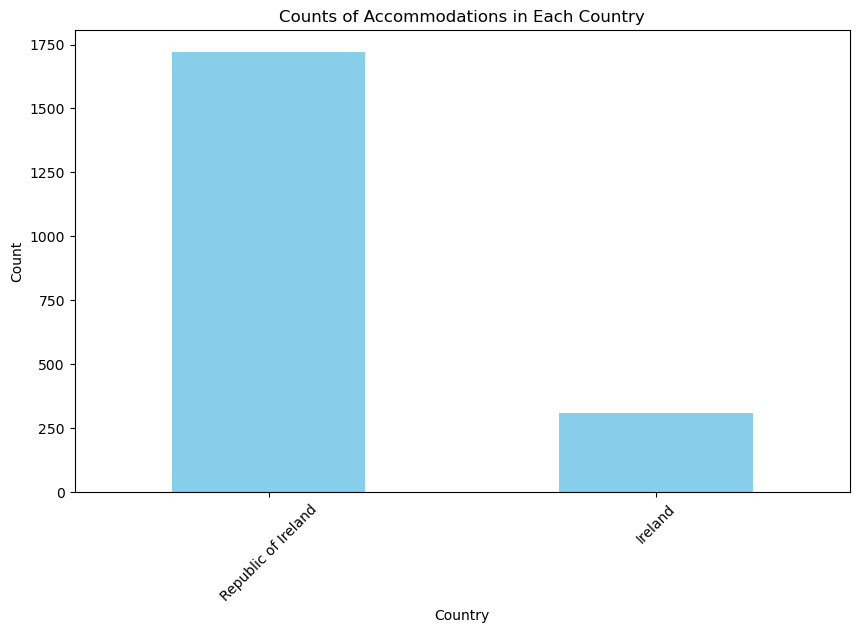

In [15]:
# Plot 1: Bar plot showing counts of accommodations in each AddressCountry
plt.figure(figsize=(10, 6))
df['AddressCountry'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Accommodations in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Replace 'Republic of Ireland' with 'Ireland' in the 'AddressCountry' column
df['AddressCountry'] = df['AddressCountry'].replace('Republic of Ireland', 'Ireland')

In [17]:
df.head(500)

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
2,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Ireland,Camping
3,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Ireland,Camping
4,Flemings White Bridge Caravan and Camping,http://www.killarneycamping.com,+353(0)646631590,-9.475904,52.057113,Kerry,Killarney,Ireland,Camping
5,Fossa Caravan and Camping Park,http://www.fossacampingkillarney.com,+353(0)646631497,-9.585609,52.070824,Kerry,Fossa,Ireland,Camping
6,Streamstown Caravan & Camping Park,http://www.tipperarycaravanpark.com,35350521519,-7.839326,52.957265,Tipperary,Roscrea,Ireland,Camping
...,...,...,...,...,...,...,...,...,...
579,Killadangan House,http://killadanganhouse.com/,+353(0)876689758,-9.597560,53.781206,Mayo,Westport,Ireland,Self Catering Accommodation
580,Rhu Glenn Country Club Hotel,http://www.rhuglennhotel.com,+353(0)51832242,-7.054185,52.297288,Waterford,Waterford City,Ireland,Hotel
581,Commons Inn,http://www.commonsinn.com,+353(0)214210300,-8.487611,51.921844,Cork,Cork City,Ireland,Hotel
582,Clare's Rock,http://www.claresrock.com,+353(0)863660641,-9.076840,53.034571,Clare,Carran,Ireland,"Hostel,Welcome Standard"


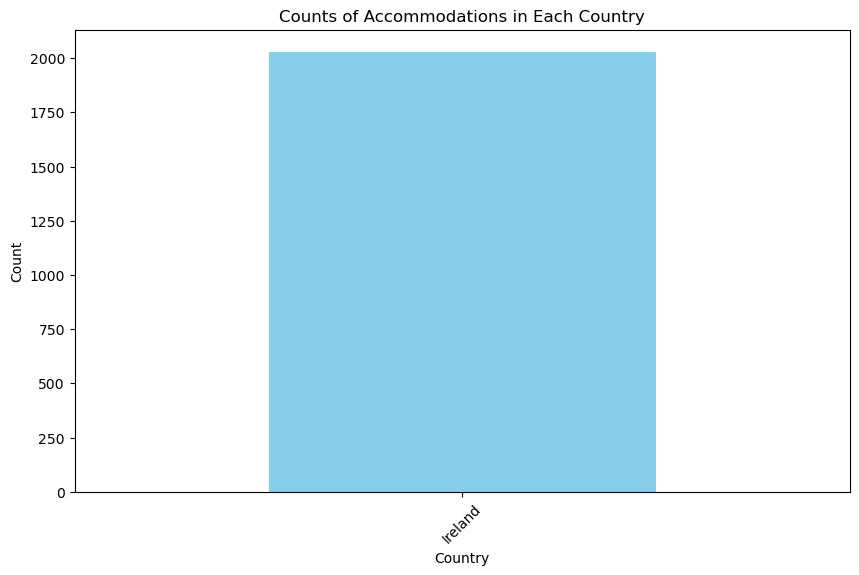

In [18]:
# Plot 1: Bar plot showing counts of accommodations in each AddressCountry
plt.figure(figsize=(10, 6))
df['AddressCountry'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Counts of Accommodations in Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

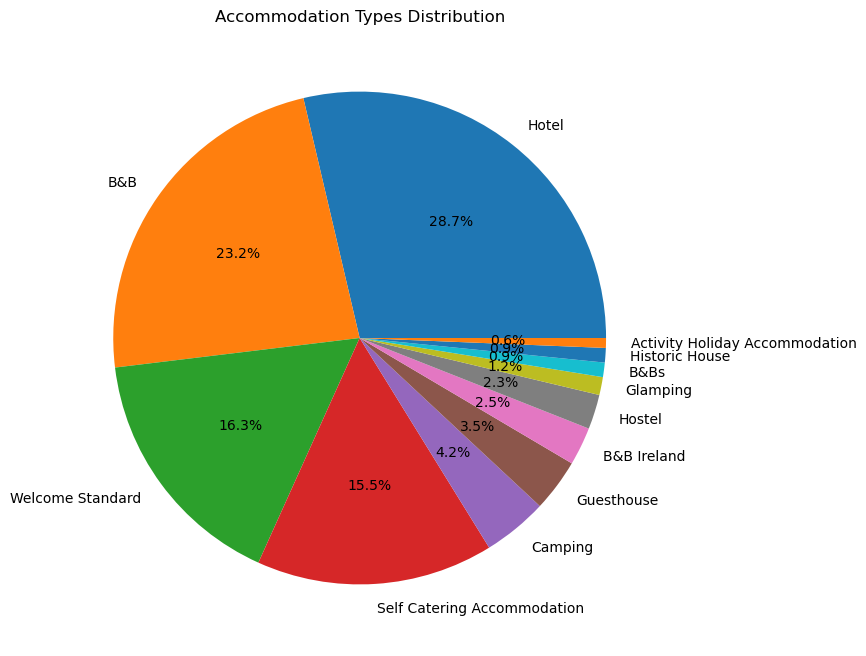

In [19]:
# Extract and plot accommodation types distribution
accommodation_types = df['Tags'].str.split(',').explode().str.strip().value_counts()
accommodation_types.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Accommodation Types Distribution')
plt.ylabel('')
plt.savefig('accommodation_types_distribution.png')
plt.show()

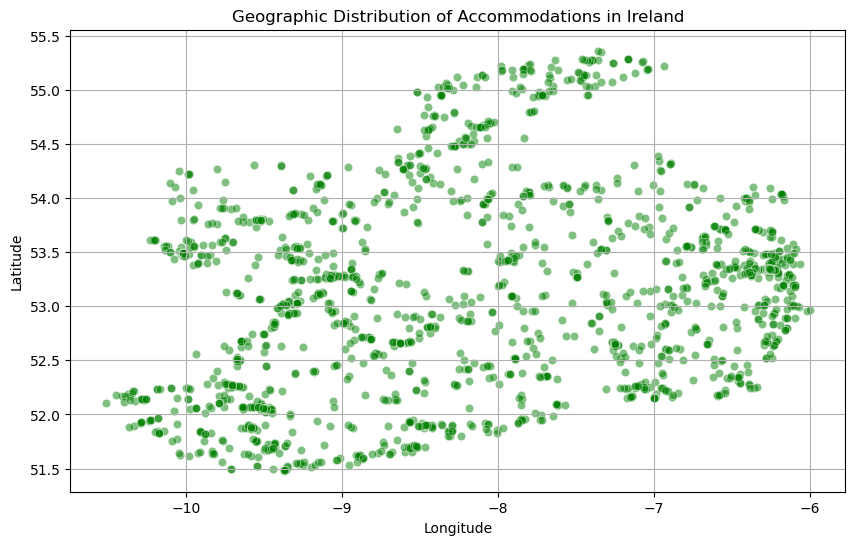

In [20]:
# Scatter Plot of Accommodation Longitude vs. Latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df, color='green', alpha=0.5)
plt.title('Geographic Distribution of Accommodations in Ireland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

##   Analysis using Discrete Distributions (Binomial and Poisson)n


In [21]:
# Count the frequency of each tag in the 'Tags' column
tag_counts = df['Tags'].value_counts()

# Generate hypothetical data for 'Tags' frequency
tags_frequency = tag_counts.values

In [22]:
# Binomial Distribution
n = len(tags_frequency)  # Number of trials
p = 0.5  # Probability of success
binomial_dist = binom(n, p)
binomial_prob = binomial_dist.pmf(np.arange(0, tags_frequency.max() + 1))

In [27]:
# Poisson Distribution
poisson_lambda = tags_frequency.mean()
poisson_dist = poisson(poisson_lambda)
poisson_prob = poisson_dist.pmf(np.arange(0, tags_frequency.max() + 1))


In [29]:
from scipy.stats import poisson
# Count the number of accommodations in each region
region_counts = df['AddressRegion'].value_counts()

In [30]:
# Calculate the mean count of accommodations across regions
mean_accommodations = region_counts.mean()

In [31]:
# Calculate the Poisson probability for each count
poisson_prob = [poisson_dist.pmf(i) for i in range(len(region_counts))]

In [32]:
# Calculate 95% confidence intervals for the Poisson distribution
poisson_ci = [poisson_dist.interval(0.95) for _ in range(len(region_counts))]

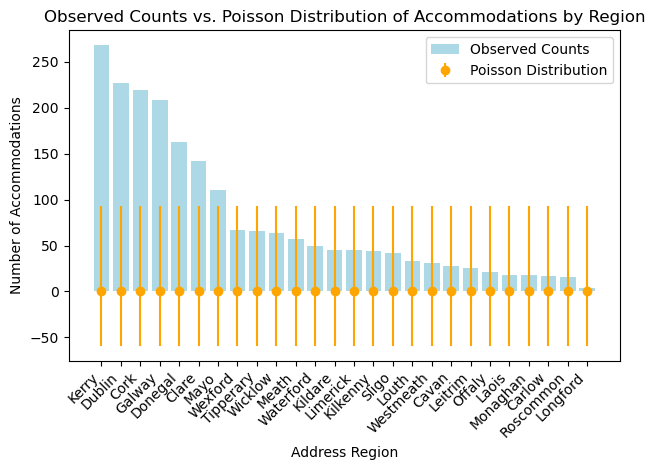

In [33]:
# Plot observed counts
plt.bar(range(len(region_counts)), region_counts.values, color='lightblue', label='Observed Counts')

# Plot Poisson distribution
plt.errorbar(range(len(region_counts)), poisson_prob, yerr=np.abs(np.array(poisson_ci).T - np.array(poisson_prob)), fmt='o', color='orange', label='Poisson Distribution')

# Set x-axis ticks and labels
plt.xticks(range(len(region_counts)), region_counts.index, rotation=45, ha='right')

# Add labels and title
plt.xlabel('Address Region')
plt.ylabel('Number of Accommodations')
plt.title('Observed Counts vs. Poisson Distribution of Accommodations by Region')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


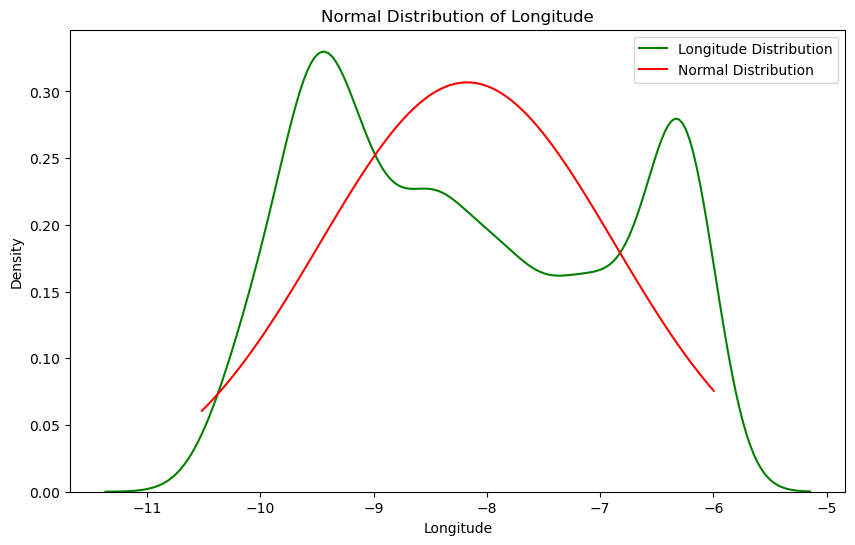

In [34]:
# Normal Distribution
mean_longitude = df['Longitude'].mean()
std_longitude = df['Longitude'].std()
normal_dist = norm(loc=mean_longitude, scale=std_longitude)

# Visualization of Normal Distribution using KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Longitude'], color='green', label='Longitude Distribution')
plt.plot(np.linspace(df['Longitude'].min(), df['Longitude'].max(), 100),
         normal_dist.pdf(np.linspace(df['Longitude'].min(), df['Longitude'].max(), 100)),
         color='red', label='Normal Distribution')
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.title('Normal Distribution of Longitude')
plt.legend()
plt.show()



## Step 2:  Data preparation and Visualization (EDA)

In [35]:
# Summary statistics
print(df.describe())

         Longitude     Latitude
count  2029.000000  2029.000000
mean     -8.173382    53.067448
std       1.300118     0.906434
min     -10.514531    51.479594
25%      -9.374026    52.259917
50%      -8.369672    53.124848
75%      -6.947458    53.548435
max      -5.998080    55.361922


In [36]:
# Summary Statistics
print("Summary Statistics:")
df_info = df[['Name', 'Url', 'Telephone', 'Longitude', 'Latitude', 'AddressRegion', 'AddressLocality', 'AddressCountry', 'Tags']].info()
print("\nNumber of unique values:")
print(df[['Name', 'Url', 'Telephone', 'Longitude', 'Latitude', 'AddressRegion', 'AddressLocality', 'AddressCountry', 'Tags']].nunique())

# Printing out the info results
print(df_info)

Summary Statistics:
<class 'pandas.core.frame.DataFrame'>
Index: 2029 entries, 2 to 2338
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2029 non-null   object 
 1   Url              2029 non-null   object 
 2   Telephone        2029 non-null   object 
 3   Longitude        2029 non-null   float64
 4   Latitude         2029 non-null   float64
 5   AddressRegion    2029 non-null   object 
 6   AddressLocality  2029 non-null   object 
 7   AddressCountry   2029 non-null   object 
 8   Tags             2029 non-null   object 
dtypes: float64(2), object(7)
memory usage: 158.5+ KB

Number of unique values:
Name               2024
Url                2012
Telephone          1938
Longitude          2002
Latitude           2004
AddressRegion        26
AddressLocality     600
AddressCountry        1
Tags                 27
dtype: int64
None


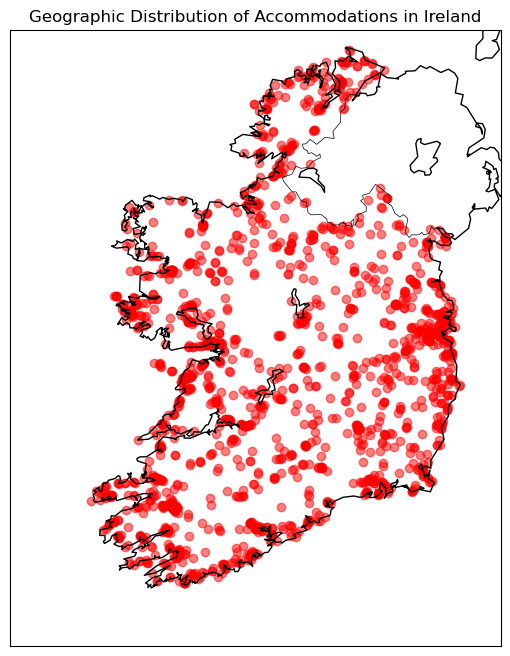

In [37]:
from mpl_toolkits.basemap import Basemap

# Create a Basemap object
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=51.0, urcrnrlat=55.5, llcrnrlon=-11.5, urcrnrlon=-5.5, resolution='i')

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert longitude and latitude coordinates to map projection
x, y = m(df["Longitude"].values, df["Latitude"].values)

# Plot accommodation locations on the map
m.scatter(x, y, color='red', marker='o', alpha=0.5)

# Add title and show the plot
plt.title('Geographic Distribution of Accommodations in Ireland')
plt.savefig('Geographic_Distribution_of_Accommodations_in_Ireland.png')
plt.show()

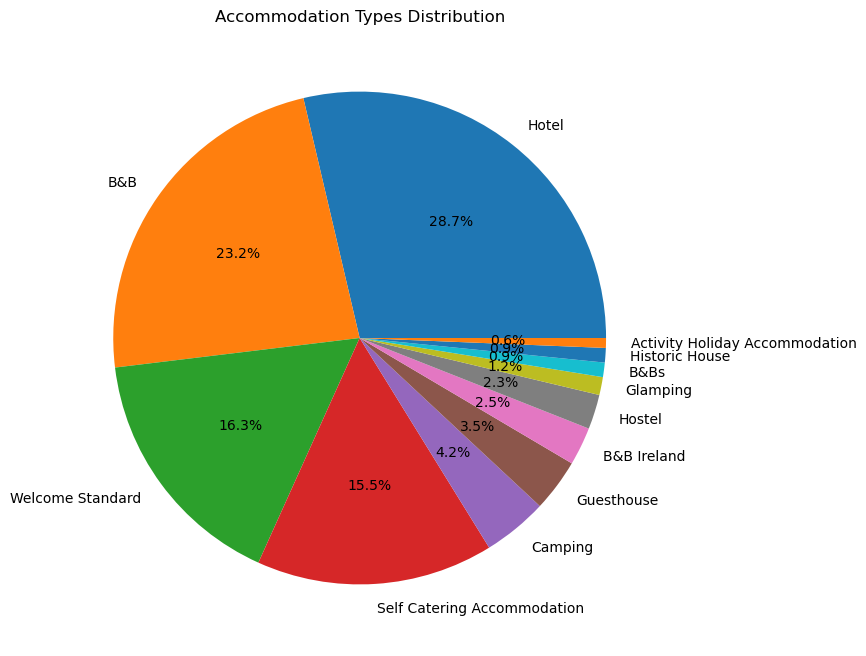

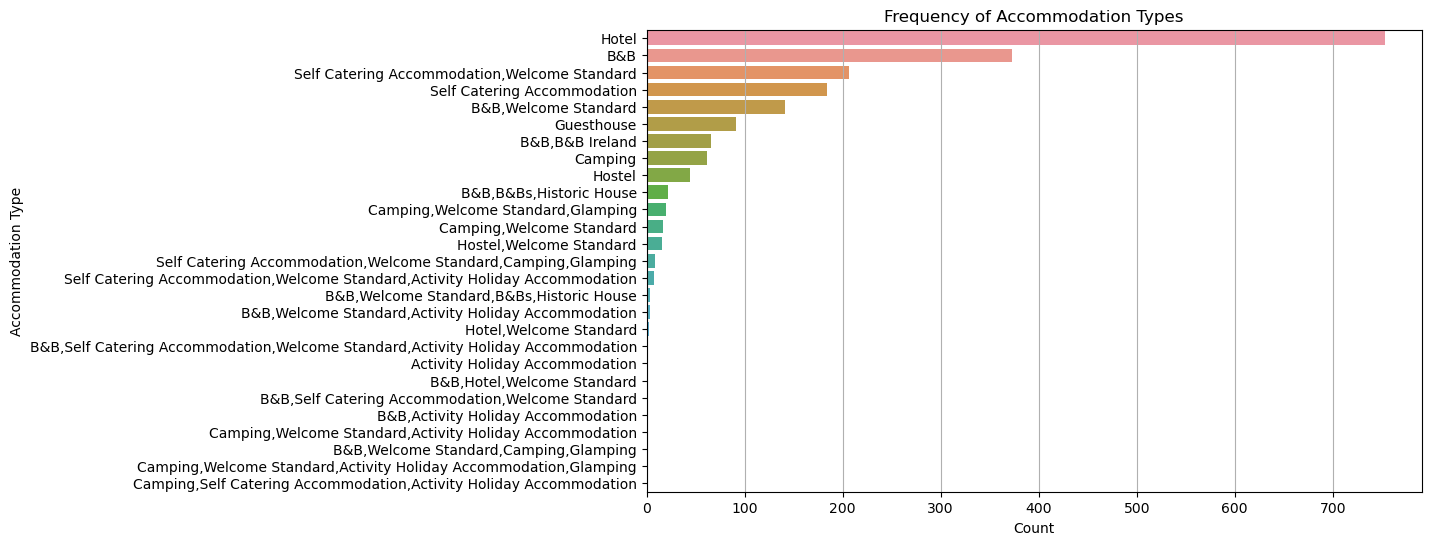

In [38]:
# Extract and plot accommodation types distribution
accommodation_types = df['Tags'].str.split(',').explode().str.strip().value_counts()
accommodation_types.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Accommodation Types Distribution')
plt.ylabel('')
plt.savefig('accommodation_types_distribution.png')
plt.show()
# Bar Chart of Accommodation Types
plt.figure(figsize=(10, 6))
sns.countplot(y='Tags', data=df, order=df['Tags'].value_counts().index)
plt.title('Frequency of Accommodation Types')
plt.xlabel('Count')
plt.ylabel('Accommodation Type')
plt.grid(axis='x')
plt.savefig('bar plot accommodation_types_distribution.png')
plt.show()




AddressLocality Column:
AddressLocality
Dublin City      145
Killarney         82
Galway City       38
Clifden           37
Kenmare           35
Kinsale           29
Doolin            29
Westport          28
Cork City         28
Kilkenny City     26
Name: count, dtype: int64


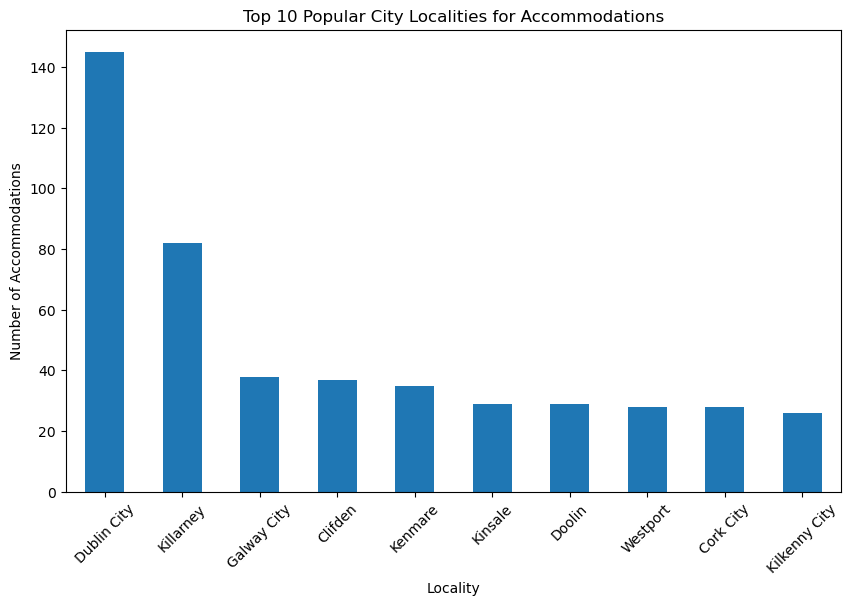

In [39]:
# Plot top 5 popular localities for accommodations
print("\n\nAddressLocality Column:")
print(df['AddressLocality'].value_counts().head(10))  # Display top 10 tags
top_localities = df['AddressLocality'].value_counts().nlargest(10)
top_localities.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Popular City Localities for Accommodations')
plt.xlabel('Locality')
plt.ylabel('Number of Accommodations')
plt.xticks(rotation=45)
plt.savefig('top_localities.png')
plt.show()

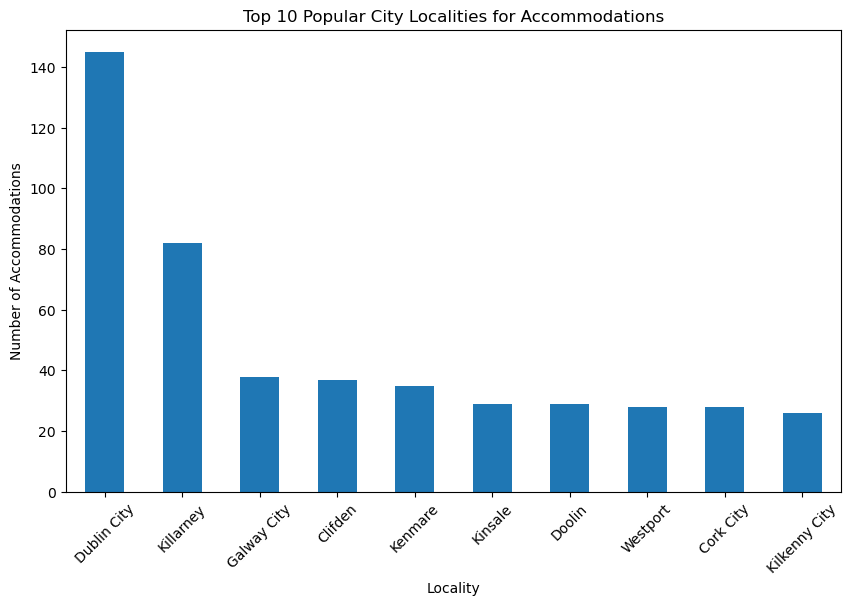

In [40]:
# Plot top 5 popular localities for accommodations
top_localities = df['AddressLocality'].value_counts().nlargest(10)
top_localities.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Popular City Localities for Accommodations')
plt.xlabel('Locality')
plt.ylabel('Number of Accommodations')
plt.xticks(rotation=45)
plt.savefig('top_localities.png')
plt.show()



Tags Column:
Tags
Hotel                                           753
B&B                                             373
Self Catering Accommodation,Welcome Standard    206
Self Catering Accommodation                     184
B&B,Welcome Standard                            141
Guesthouse                                       91
B&B,B&B Ireland                                  66
Camping                                          62
Hostel                                           44
B&B,B&Bs,Historic House                          22
Name: count, dtype: int64


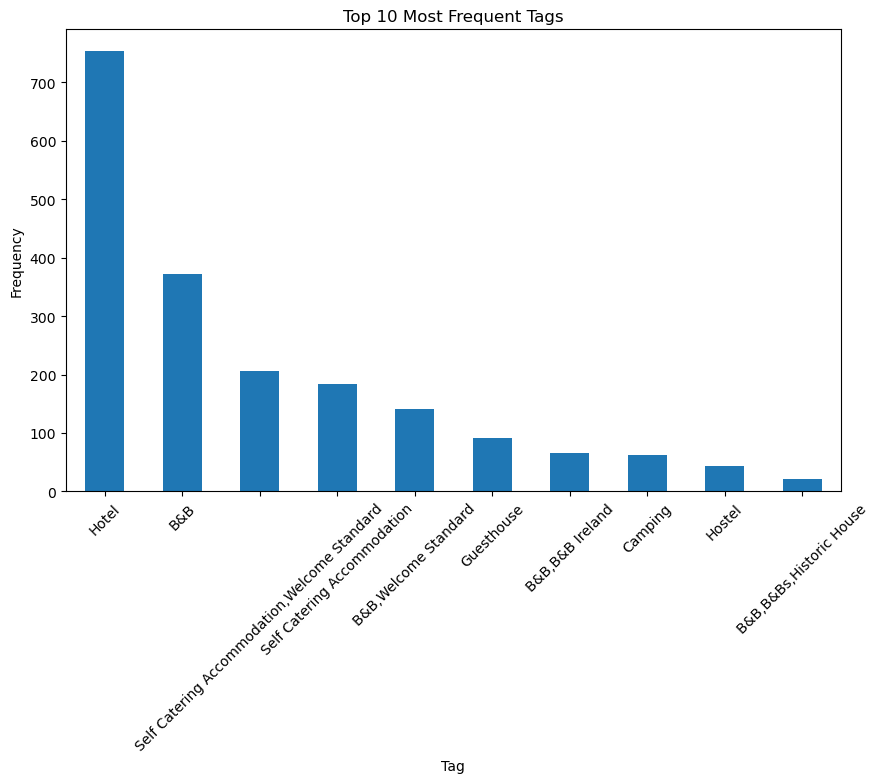

In [41]:
## 'Tags' Column
print("\n\nTags Column:")
print(df['Tags'].value_counts().head(10))  # Display top 10 tags
plt.figure(figsize=(10, 6))
df['Tags'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



Tags Column:
Telephone
+3539530620         13
+353(0)16704733      8
+35361411109         7
+447961415467        5
+35316704733         5
+353(0)12018479      4
+353(0)61411109      4
+353868599995        3
+353(0)868599995     3
+353(0)646641170     3
Name: count, dtype: int64


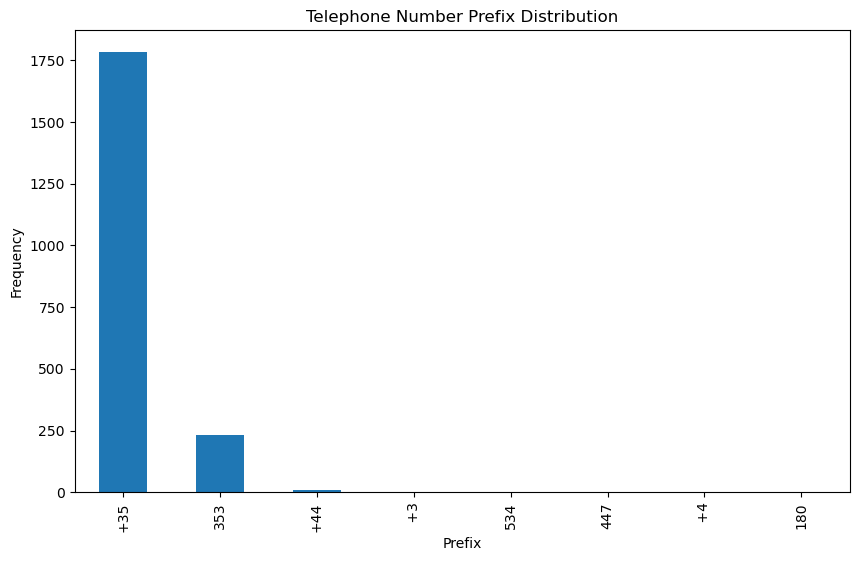

In [42]:
# Extract telephone number prefixes and plot their distribution
print("\n\nTags Column:")
print(df['Telephone'].value_counts().head(10))  # Display top 10 tags
df['Telephone_prefix'] = df['Telephone'].str[:3]
telephone_distribution = df['Telephone_prefix'].value_counts()
telephone_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Telephone Number Prefix Distribution')
plt.xlabel('Prefix')
plt.ylabel('Frequency')
plt.savefig('telephone_prefix_distribution.png')
plt.show()

In [43]:
# Statistical Analysis (Example: Correlation between Ratings and Location)
correlation = df[['Latitude', 'Longitude']].corr()
print("Correlation between Latitude, Longitude,")
print(correlation)

Correlation between Latitude, Longitude,
           Latitude  Longitude
Latitude   1.000000   0.286544
Longitude  0.286544   1.000000


## Step 3: Machine learning for Data Analytics

In [57]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
# Separate features and target variable
X = df[['Longitude', 'Latitude']]
y = df['Tags']

In [59]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Define supervised learning algorithms

## Decision Tree Classifier

In [60]:
# Define Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

In [61]:
# Define hyperparameters grid for Decision Tree
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20]}

In [62]:
# Perform hyperparameter tuning for Decision Tree
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
dt_best_params = dt_grid_search.best_params_

In [63]:
# Evaluate Decision Tree model
dt_classifier.set_params(**dt_best_params)
dt_classifier.fit(X_train, y_train)
dt_y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# Print results for Decision Tree model
print("Best parameters for Decision Tree:", dt_best_params)
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-score:", dt_f1)
print()

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}
Accuracy: 0.312807881773399
Precision: 0.25534246962818385
Recall: 0.312807881773399
F1-score: 0.264375198617016



## Random Forest Classifier

In [65]:
# Define Random Forest Classifier
rf_classifier = RandomForestClassifier()

In [68]:
# Define hyperparameters grid for Random Forest
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

In [69]:
# Perform hyperparameter tuning for Random Forest
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_

In [70]:
# Evaluate Random Forest model
rf_classifier.set_params(**rf_best_params)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# Print results for Random Forest model
print("Best parameters for Random Forest:", rf_best_params)
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.3645320197044335
Precision: 0.27429124230662555
Recall: 0.3645320197044335
F1-score: 0.28996684382061466


## Combine results into a DataFrame

In [72]:
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'Precision': [dt_precision, rf_precision],
    'Recall': [dt_recall, rf_recall],
    'F1-score': [dt_f1, rf_f1]
})

In [73]:
# Print combined results table
print("\nCombined Model Performance Metrics:")
print(results_df)


Combined Model Performance Metrics:
           Model  Accuracy  Precision    Recall  F1-score
0  Decision Tree  0.312808   0.255342  0.312808  0.264375
1  Random Forest  0.364532   0.274291  0.364532  0.289967


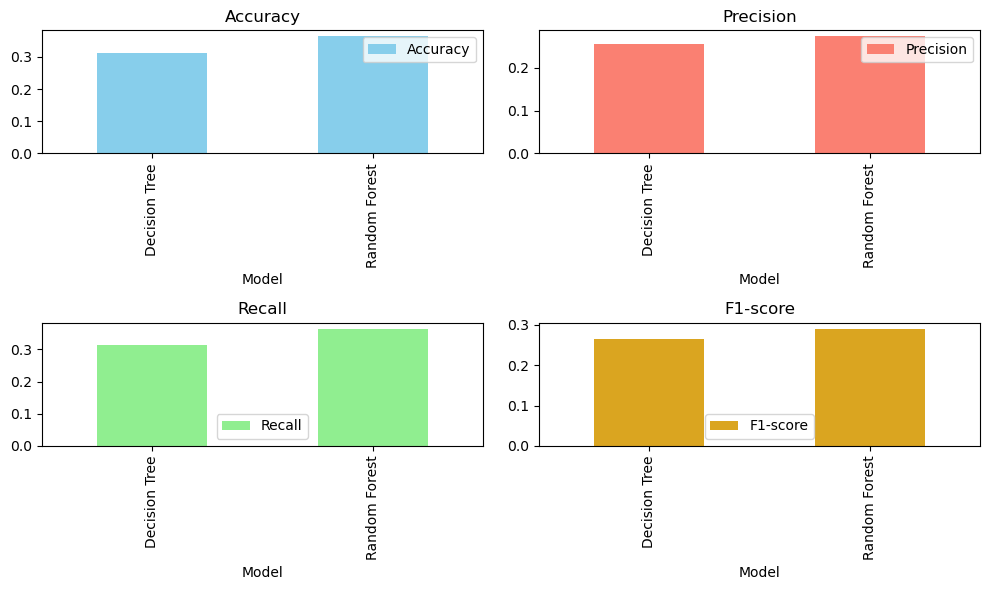

In [74]:
# Plotting
plt.figure(figsize=(10, 6))
# Accuracy plot
plt.subplot(2, 2, 1)
results_df.plot(x='Model', y='Accuracy', kind='bar', ax=plt.gca(), color='skyblue')
plt.title('Accuracy')

# Precision plot
plt.subplot(2, 2, 2)
results_df.plot(x='Model', y='Precision', kind='bar', ax=plt.gca(), color='salmon')
plt.title('Precision')

# Recall plot
plt.subplot(2, 2, 3)
results_df.plot(x='Model', y='Recall', kind='bar', ax=plt.gca(), color='lightgreen')
plt.title('Recall')

# F1-score plot
plt.subplot(2, 2, 4)
results_df.plot(x='Model', y='F1-score', kind='bar', ax=plt.gca(), color='goldenrod')
plt.title('F1-score')

plt.tight_layout()
plt.show()

## Prediction 

In [75]:
def predict_tag(longitude, latitude, dt_classifier, rf_classifier):
    # Preprocess the longitude and latitude if necessary
    input_features = pd.DataFrame({'Longitude': [longitude], 'Latitude': [latitude]})
    
    # Initialize a dictionary to store predictions
    predictions = {}
    
    # Predict tags using Decision Tree classifier
    dt_prediction = dt_classifier.predict(input_features)
    predictions['Decision Tree'] = dt_prediction[0]  # Assuming there's only one prediction
    
    # Predict tags using Random Forest classifier
    rf_prediction = rf_classifier.predict(input_features)
    predictions['Random Forest'] = rf_prediction[0]  # Assuming there's only one prediction
        
    return predictions


In [76]:
# Example inputs for longitude and latitude
example_longitude = -9.829112 # Replace with your longitude value
example_latitude = 51.635369    # Replace with your latitude value

In [77]:
predictions = predict_tag(example_longitude, example_latitude, dt_classifier, rf_classifier)

In [78]:
# Print predicted tags
print("Predicted Tags:")
for name, tag in predictions.items():
    print(f"{name}: {tag}")

Predicted Tags:
Decision Tree: B&B
Random Forest: Self Catering Accommodation


## conclusions